In [1]:
import pandas as pd
import numpy as np

In [5]:
albedo_map = pd.read_csv('Dataset/Moon/Albedo_Map.csv')
fe = pd.read_csv('Dataset/Moon/LPFe_Map.csv')
k = pd.read_csv('Dataset/Moon/LPK_Map.csv')
th = pd.read_csv('Dataset/Moon/LPTh_Map.csv')
ti = pd.read_csv('Dataset/Moon/LPTi_Map.csv')

In [6]:
%matplotlib inline 
from matplotlib import pyplot as plt

Interpolation is done to reduce noise in images

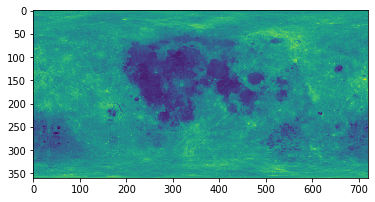

In [7]:
albedo_map_arr = albedo_map.to_numpy()
plt.imshow(albedo_map_arr, interpolation='none')
plt.show()

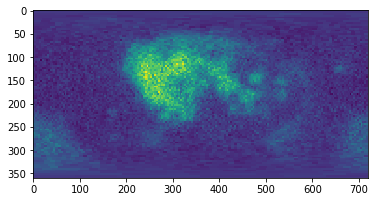

In [8]:
fe_arr = fe.to_numpy()
plt.imshow(fe_arr, interpolation='nearest')
plt.show()

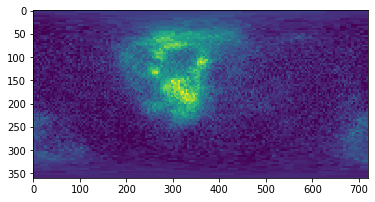

In [9]:
k_arr = k.to_numpy()
plt.imshow(k_arr, interpolation='nearest')
plt.show()

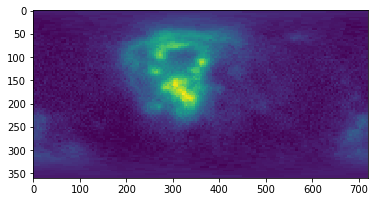

In [10]:
th_arr = th.to_numpy()
plt.imshow(th_arr, interpolation='nearest')
plt.show()

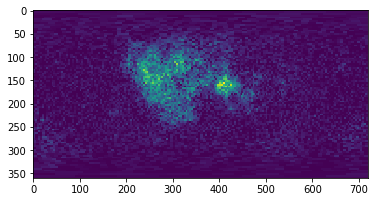

In [11]:
ti_arr = ti.to_numpy()
plt.imshow(ti_arr, interpolation='nearest')
plt.show()

### Fe

In [12]:
x_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_train = fe.iloc[:,:int(fe.shape[1]/2)]
x_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]
y_test = fe.iloc[:,int(fe.shape[1]/2):]

In [51]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

5.352710561557277

#### Output predicted comparisions

In [53]:
column = []
for i in range(361,721):
    column.append(i)

In [54]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

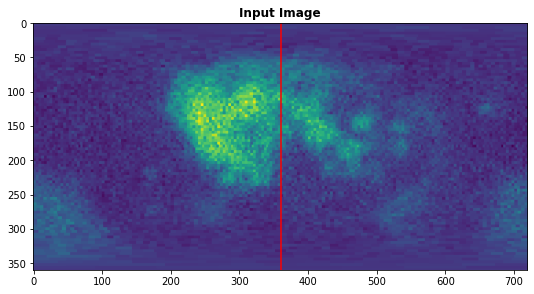

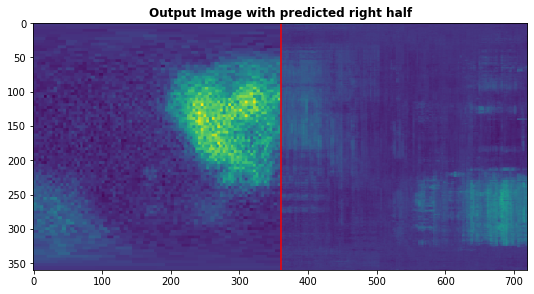

In [55]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(fe_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [56]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


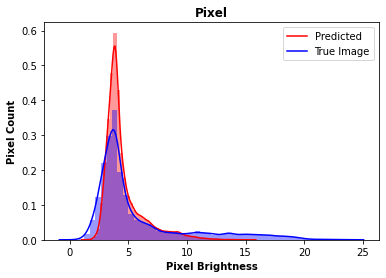

In [58]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### K

In [59]:
x_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_train = k.iloc[:,:int(k.shape[1]/2)]
x_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]
y_test = k.iloc[:,int(k.shape[1]/2):]

In [60]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

501736.3188837213

#### Output predicted comparisions

In [62]:
column = []
for i in range(361,721):
    column.append(i)

In [63]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

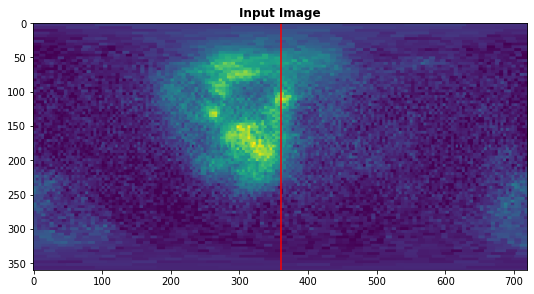

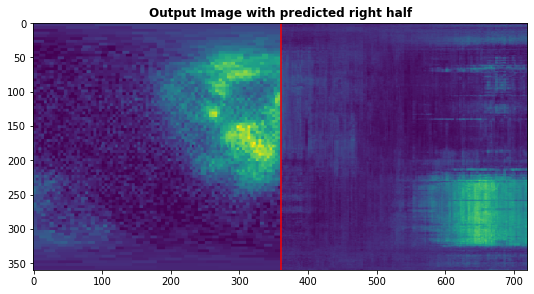

In [64]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(k_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [65]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


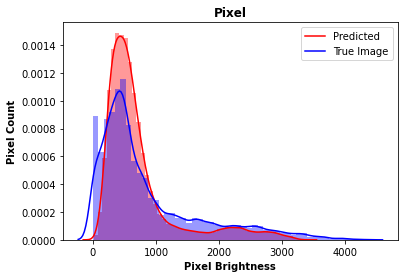

In [66]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Th

In [67]:
x_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_train = th.iloc[:,:int(th.shape[1]/2)]
x_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]
y_test = th.iloc[:,int(th.shape[1]/2):]

In [68]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3.2507763642738876

#### Output predicted comparisions

In [70]:
column = []
for i in range(361,721):
    column.append(i)

In [71]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

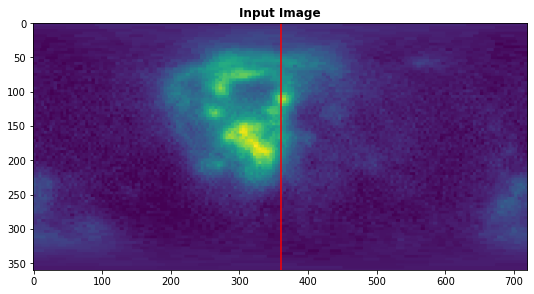

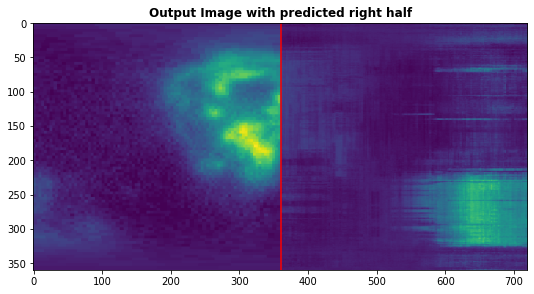

In [72]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(th_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [73]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


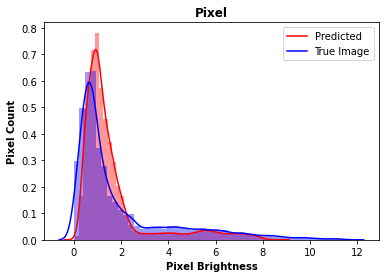

In [74]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Ti

In [75]:
x_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_train = ti.iloc[:,:int(ti.shape[1]/2)]
x_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]
y_test = ti.iloc[:,int(ti.shape[1]/2):]

In [76]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.3382655671972581

#### Output predicted comparisions

In [78]:
column = []
for i in range(361,721):
    column.append(i)

In [79]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

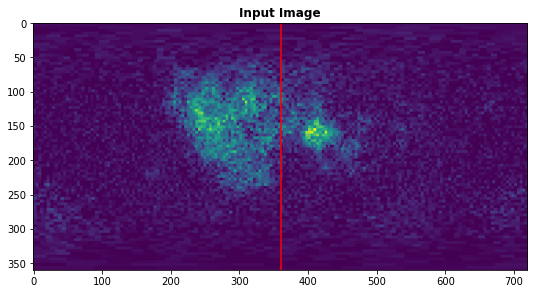

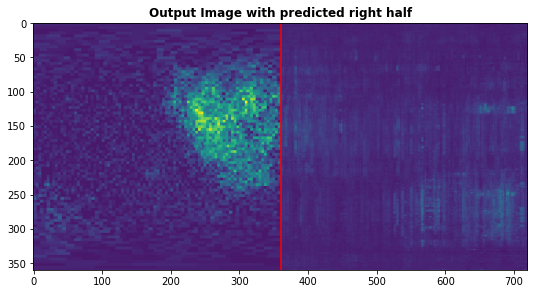

In [80]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(ti_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [81]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


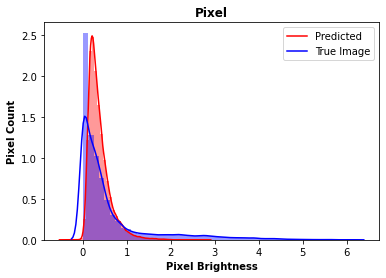

In [82]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])